In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
#load data
cleandata =  pd.read_csv('/Users/julieagwu/Library/Mobile Documents/com~apple~CloudDocs/GB Power Market/Settlement Data/data/cleanedsettlement.csv')

In [3]:
cleandata.head()

,SystemBuyPrice,NetImbalanceVolume,Date,Time
0,45.32,-140.641667,2024-09-09,00:00:00
1,60.12,-5.233333,2024-09-09,00:30:00
2,102.50,19.522222,2024-09-09,01:00:00
3,49.44,-87.358333,2024-09-09,01:30:00
4,104.00,263.658333,2024-09-09,02:00:00


In [7]:
#put date and time at beginning of dataset
cleandata = cleandata.set_index('Time')

In [8]:
cleandata.head()

,SystemBuyPrice,NetImbalanceVolume
Time,,
00:00:00,45.32,-140.641667
00:30:00,60.12,-5.233333
01:00:00,102.50,19.522222
01:30:00,49.44,-87.358333
02:00:00,104.00,263.658333


/var/folders/b5/1_08zkhn1fjgrlrzcc7t2rp40000gn/T/ipykernel_15781/3045409135.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  daily_avg_price = cleandata.resample('30T').mean()


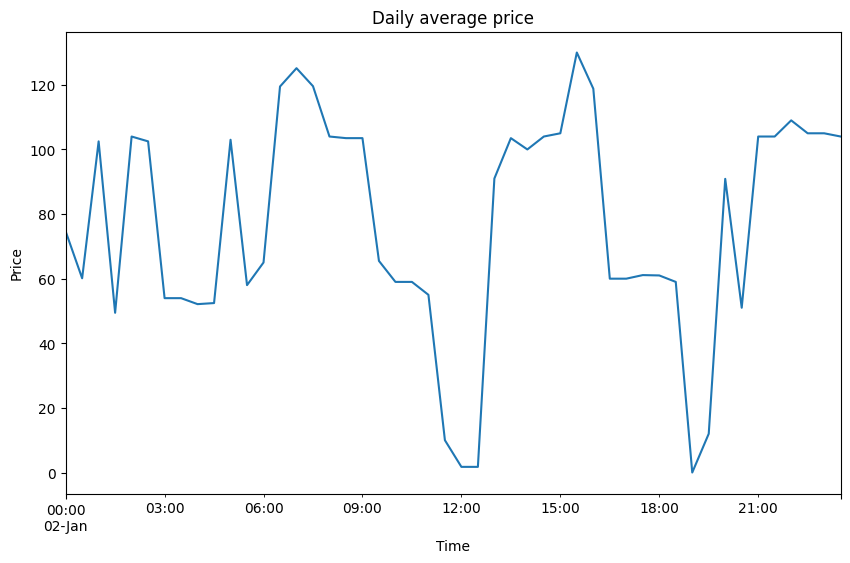

In [23]:
cleandata.index = pd.to_datetime(cleandata.index)
daily_avg_price = cleandata.resample('30T').mean()
#plot this
plt.figure(figsize=(10,6))
daily_avg_price['SystemBuyPrice'].plot()
plt.title('Daily average price')
plt.ylabel('Price')
plt.show()


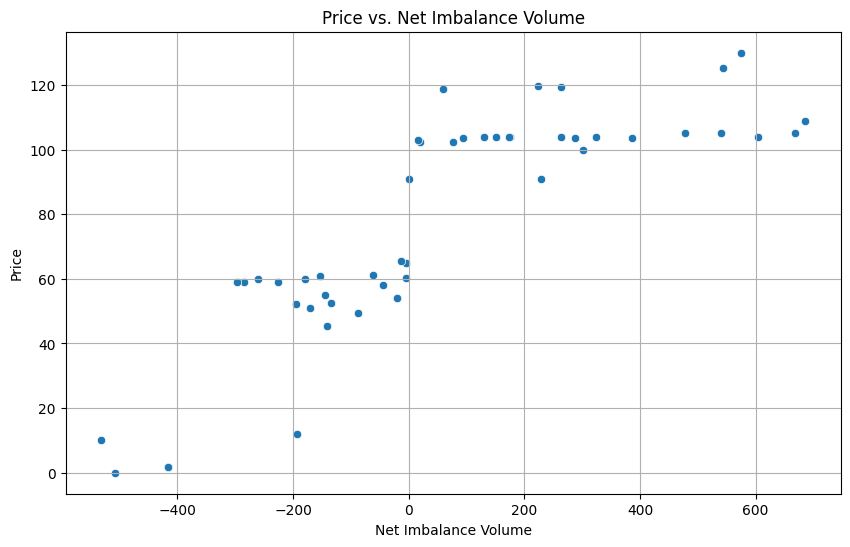

In [21]:
# Scatter plot for price vs. net imbalance volume

plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleandata, x='NetImbalanceVolume', y='SystemBuyPrice')
plt.title('Price vs. Net Imbalance Volume')
plt.xlabel('Net Imbalance Volume')
plt.ylabel('Price')
plt.grid()
plt.show()



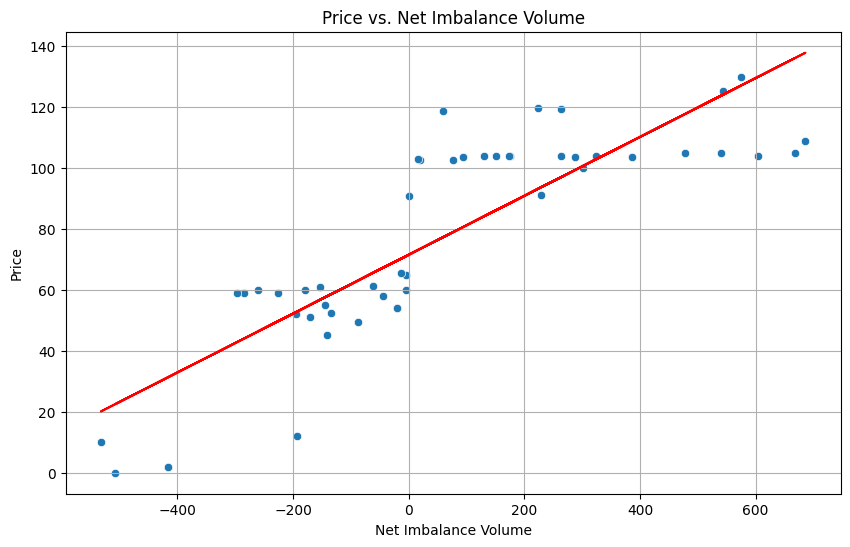

In [24]:
#draw line of best fit
X = cleandata['NetImbalanceVolume']
y = cleandata['SystemBuyPrice']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
a = model.params['NetImbalanceVolume']
b = model.params['const']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleandata, x='NetImbalanceVolume', y='SystemBuyPrice')
plt.plot(cleandata['NetImbalanceVolume'], a*cleandata['NetImbalanceVolume'] + b, color='red')
plt.title('Price vs. Net Imbalance Volume')
plt.xlabel('Net Imbalance Volume')
plt.ylabel('Price')     
plt.grid()
plt.show()